# Classify vertical flight profiles into developed & others

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'dashlink/'

In [0]:
from fastai.vision import *
import glob

import torchvision
import torchvision.transforms as T
from torchvision import datasets
import torch

In [0]:
#confirm we are in DASHlink
# !cd gdrive/"My Drive"/dashlink
!pwd

/content


In [0]:
!ls

gdrive	sample_data


In [0]:
# set inference folder
infpath = Path(base_dir + 'Tail_687_3'); infpath

PosixPath('/content/gdrive/My Drive/dashlink/Tail_687_3')

In [0]:
# set output folder
# outpath = Path('png3'); outpath #for altitude line plots
outpath = Path('png4'); outpath #for altitude line plots
# outpath = Path('png3b'); outpath #for Gramian Angular Summation Field (GASF)
# outpath = Path('png3c'); outpath #for Gramian Angular Difference Field (GADF)
# outpath = Path('png3d'); outpath #for Markov Transition Field (MTF)
# outpath = Path('png3e'); outpath #for Recurrence Plot (RP)
# outpath = Path('png3f'); outpath #for altitude area plots

PosixPath('png4')

## Setup input for **inference**

In [0]:
# clean input folder
!rm "{infpath}"/{outpath}/*.png

rm: cannot remove '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/*.png': No such file or directory


In [0]:
srcpath = Path('src'); srcpath

PosixPath('src')

In [0]:
# cp Tail_687_3/src/*.png to Tail_687_3/png3
# !cp "{infpath}"/src/*.png "{infpath}"/{outpath}
!cp "{infpath}"/{srcpath}/*.png "{infpath}"/{outpath}

cp: cannot stat '/content/gdrive/My Drive/dashlink/Tail_687_3/src/*.png': No such file or directory


In [0]:
! ls -alh "{infpath}"/{outpath}

total 1.4M
-rw------- 1 root root 2.6K Sep  3 16:31 687200112311614-1min.png
-rw------- 1 root root 2.9K Sep  3 16:31 687200112312147-1min.png
-rw------- 1 root root 3.0K Sep  3 16:31 687200201010631-1min.png
-rw------- 1 root root 3.1K Sep  3 16:31 687200201010908-1min.png
-rw------- 1 root root 3.2K Sep  3 16:31 687200201011045-1min.png
-rw------- 1 root root 2.7K Sep  3 16:31 687200201011305-1min.png
-rw------- 1 root root 3.0K Sep  3 16:31 687200201011535-1min.png
-rw------- 1 root root 3.0K Sep  3 16:31 687200201011743-1min.png
-rw------- 1 root root 2.6K Sep  3 16:31 687200201020650-1min.png
-rw------- 1 root root 2.9K Sep  3 16:31 687200201020851-1min.png
-rw------- 1 root root 3.1K Sep  3 16:31 687200201021106-1min.png
-rw------- 1 root root 3.3K Sep  3 16:31 687200201021404-1min.png
-rw------- 1 root root 3.2K Sep  3 16:31 687200201021619-1min.png
-rw------- 1 root root 3.4K Sep  3 16:31 687200201021953-1min.png
-rw------- 1 root root 3.4K Sep  3 16:31 687200201031028-1min.png

In [0]:
#MOVE later !!!!!
#if output dirs do not exist, create it
# (infpath/outpath/'typ').mkdir(parents=True, exist_ok=True)
# (infpath/outpath/'non').mkdir(parents=True, exist_ok=True)

In [0]:
! ls "{infpath}"/{outpath}/non/*.*

ls: cannot access '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/*.*': No such file or directory


In [0]:
! ls "{infpath}"/{outpath}/typ/*.*

ls: cannot access '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/*.*': No such file or directory


In [0]:
#remove all output files from outpath/non
! rm "{infpath}"/{outpath}/non/*.png
! ls "{infpath}"/{outpath}/non/*.*

rm: cannot remove '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/*.png': No such file or directory
ls: cannot access '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/*.*': No such file or directory


In [0]:
#remove all output files from outpath/typ
! rm "{infpath}"/{outpath}/typ/*.png
! ls "{infpath}"/{outpath}/typ/*.*

rm: cannot remove '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/*.png': No such file or directory
ls: cannot access '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/*.*': No such file or directory


## Inference/Production

In [0]:
trnpath = Path(base_dir + 'Tail_687_1'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink/Tail_687_1')

In [0]:
#ensure export.pkl is in folder
##!ls {trnpath}/png1/export.pkl
# !ls "{trnpath}"/png3a/export.pkl
!ls "{trnpath}"/png4a/*.*

'/content/gdrive/My Drive/dashlink/Tail_687_1/png4a/autoencoder-3.pth'
'/content/gdrive/My Drive/dashlink/Tail_687_1/png4a/autoencoder.pkl'


In [0]:
# class LinearAutoencoder(nn.Module):
#   def __init__(self, encoding_dim):
#     super(LinearAutoencoder, self).__init__()
#     #encoder
#     self.fc1e = nn.Linear(1*128*128, encoding_dim)
#     #self.fc2e = nn.Linear(1024, encoding_dim)

#     #decoder
#     #self.fc2d = nn.Linear(encoding_dim, 1024)
#     self.fc1d = nn.Linear(encoding_dim, 1*128*128)
    
#   def forward(self, x):
#     x = F.relu(self.fc1e(x))
#     #x = F.relu(self.fc2e(x))
    
#     #x = F.relu(self.fc2d(x))
#     x = torch.sigmoid(self.fc1d(x)) #scaling from 0 to 1
#     return x

In [0]:
##learn = load_learner(trnpath/'png1')
##learn = load_learner(trnpath/'png3a')

# model = LinearAutoencoder(*args, **kwargs)
# model.load_state_dict(torch.load(trnpath/'png4a'))
# model.eval()

model = torch.load(trnpath/'png4a'/'autoencoder.pkl', map_location='cpu')
model.eval()

LinearAutoencoder(
  (fc1e): Linear(in_features=16384, out_features=150, bias=True)
  (fc1d): Linear(in_features=150, out_features=16384, bias=True)
)

In [0]:
from PIL import Image
import PIL.ImageOps
from torch.utils.data import Dataset, DataLoader

class AutoencoderDataset(Dataset):
  def __init__(self, data_dir, transform):      
    # store filenames
    self.filenames = os.listdir(data_dir)
    self.filenames = [os.path.join(data_dir, f) for f in self.filenames] 
    self.transform = transform
      
  def __len__(self):
    # return size of dataset
    return len(self.filenames)
      
  def __getitem__(self, idx):
    # open image, convert from 4 to 3 channels, apply transforms, and return
  
    png = Image.open(self.filenames[idx])
    
    r,g,b,a = png.split()
    rgb_img = Image.merge('RGB', (r,g,b))
    out = rgb_img
    
    out = out.convert('L') #Luminosity, only 1 channel
    out = PIL.ImageOps.invert(out) #invert
    
    out = self.transform(out)
    return np.array(out), self.filenames[idx]

In [0]:
bs = 8

In [0]:
train_transform = T.Compose([T.Resize([128,128]), T.ToTensor()])

In [0]:
inf_dataset = AutoencoderDataset(str(infpath/outpath), train_transform)
len(inf_dataset)

211

In [0]:
inf_dataset[0][0].shape

(1, 128, 128)

In [0]:
inf_loader = torch.utils.data.DataLoader(inf_dataset, batch_size=bs, shuffle=False)

torch.Size([8, 1, 128, 128])
torch.Size([3, 132, 1042])
torch.Size([132, 1042, 3])


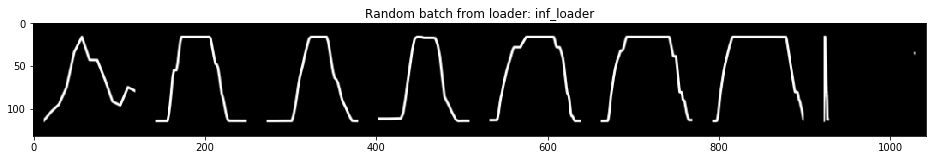

In [0]:
def show_random_batch(loader, loader_name):
  xb = iter(loader).next(); print(xb[0].shape)
  images = torchvision.utils.make_grid(xb[0]); print(images.shape)
  images = np.transpose(images, (1,2,0)); print(images.shape)
  plt.figure(figsize=(16,12))
  plt.title(f'Random batch from loader: {loader_name}')
  plt.imshow(images)
  plt.show()
  
show_random_batch(inf_loader, 'inf_loader')

In [0]:
threshold = 0.021245 #cp from training

In [0]:
xb,fb = iter(inf_loader).next()
fb

('/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200201070816-1min.png',
 '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200201071247-1min.png',
 '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200201041859-1min.png',
 '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200201060835-1min.png',
 '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200201051328-1min.png',
 '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200201050834-1min.png',
 '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200201040640-1min.png',
 '/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200201040940-1min.png')

In [0]:
xb = xb.view(xb.size(0), -1) #for 1D to flatten image into vector
xb


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [0]:
x = xb[0]; x

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [0]:
yh = model(x); yh

tensor([5.3604e-06, 5.0153e-03, 2.0531e-05,  ..., 3.3864e-04, 6.9923e-04,
        1.1410e-05], grad_fn=<SigmoidBackward>)

In [0]:
#if output dirs do not exist, create it
(infpath/outpath/'typ').mkdir(parents=True, exist_ok=True)
(infpath/outpath/'non').mkdir(parents=True, exist_ok=True)

In [0]:
loss_func = nn.MSELoss()
model.eval()
n = len(inf_dataset)
print(f'TOTAL FILES TO PROCESS: {n}\n')
for xb,fb in inf_loader:
  #if i==1: break
  ##xb,fb = result[0],result[1]
  xb = xb.view(xb.size(0), -1) #for 1D to flatten image into vector
  #xb = xb.cuda()
  for (x,f) in zip(xb,fb):
    yh = model(x)
    loss = loss_func(yh, x)
    #print('Batch: {} \treconstruction loss: {:.6f}'.format(i, loss.item()))
    recon_loss = loss.item()
    if recon_loss < threshold:
      #print(f, 'normal')      
      !mv "{f}" "{infpath}"/{outpath}/typ
    else:
      print(f, 'anomaly')      
      !mv "{f}" "{infpath}"/{outpath}/non
    #print(f'{1} of {n} complete ........................\n')    

TOTAL FILES TO PROCESS: 211

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200202150831-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200202161659-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200202140537-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200202131953-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200202121514-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200202131623-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200202120943-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200202111528-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200202101759-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200203281149-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/687200203261651-1min.png anomaly
/content/gdrive/My Drive/dashlink/Tail_687_3/png4/68720020

IsADirectoryError: ignored

In [0]:
///////////////////////////////

LinearAutoencoder(
  (fc1e): Linear(in_features=16384, out_features=150, bias=True)
  (fc1d): Linear(in_features=150, out_features=16384, bias=True)
)

In [0]:
# ##allFiles = glob.glob(str(infpath/'png1'/'*.png'))
# allFiles = glob.glob(str(infpath/outpath/'*.png'))
# n = len(allFiles)
# print(f'TOTAL FILES TO PROCESS: {n}\n')
# for i,file_ in enumerate(allFiles):
# #     if i==20: break
        
#     img = open_image(file_); #show_image(img)
#     pred_class,pred_idx,outputs = learn.predict(img)

#     print(file_)
#     print('predicted class:', pred_class)
    
#     if pred_class.obj=='typ':
#         ##!cp {file_} {infpath}/'png1'/typ
#         !mv "{file_}" "{infpath}"/{outpath}/typ
#     else:
#         ##!cp {file_} {infpath}/'png1'/non
#         !mv "{file_}" "{infpath}"/{outpath}/non
    
#     print(f'{i+1} of {n} complete ........................\n')

In [0]:
from IPython.display import Image, display

TOTAL FILES TO SHOW IN typ FOLDER: 176



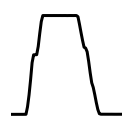

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202151039-1min.png
1 of 176 complete ........................



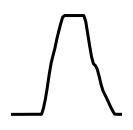

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202150903-1min.png
2 of 176 complete ........................



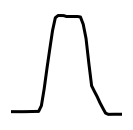

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202162049-1min.png
3 of 176 complete ........................



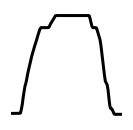

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202151705-1min.png
4 of 176 complete ........................



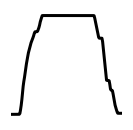

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202161201-1min.png
5 of 176 complete ........................



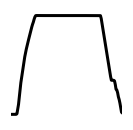

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202160417-1min.png
6 of 176 complete ........................



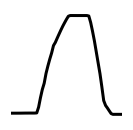

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202161530-1min.png
7 of 176 complete ........................



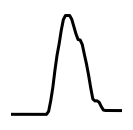

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202140813-1min.png
8 of 176 complete ........................



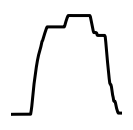

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202141501-1min.png
9 of 176 complete ........................



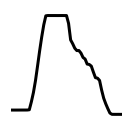

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202140934-1min.png
10 of 176 complete ........................



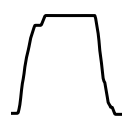

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202131239-1min.png
11 of 176 complete ........................



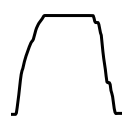

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202130953-1min.png
12 of 176 complete ........................



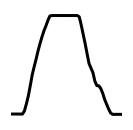

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202131823-1min.png
13 of 176 complete ........................



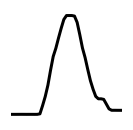

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202121403-1min.png
14 of 176 complete ........................



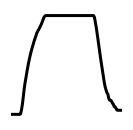

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202141954-1min.png
15 of 176 complete ........................



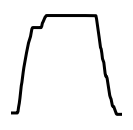

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202141138-1min.png
16 of 176 complete ........................



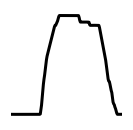

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202130619-1min.png
17 of 176 complete ........................



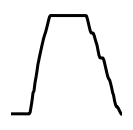

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202121737-1min.png
18 of 176 complete ........................



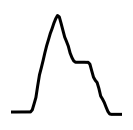

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202111020-1min.png
19 of 176 complete ........................



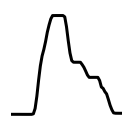

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202120641-1min.png
20 of 176 complete ........................



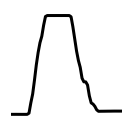

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202110804-1min.png
21 of 176 complete ........................



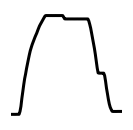

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202100953-1min.png
22 of 176 complete ........................



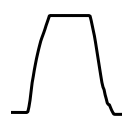

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200202111843-1min.png
23 of 176 complete ........................



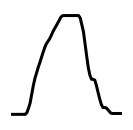

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203291540-1min.png
24 of 176 complete ........................



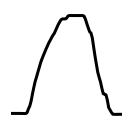

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203311801-1min.png
25 of 176 complete ........................



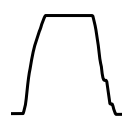

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203291722-1min.png
26 of 176 complete ........................



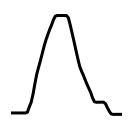

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203291030-1min.png
27 of 176 complete ........................



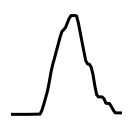

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203290814-1min.png
28 of 176 complete ........................



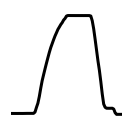

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203291407-1min.png
29 of 176 complete ........................



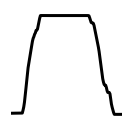

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203281723-1min.png
30 of 176 complete ........................



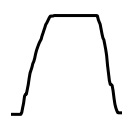

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203281223-1min.png
31 of 176 complete ........................



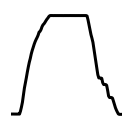

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203280952-1min.png
32 of 176 complete ........................



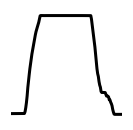

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203261300-1min.png
33 of 176 complete ........................



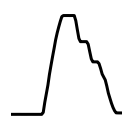

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203271859-1min.png
34 of 176 complete ........................



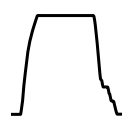

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203290437-1min.png
35 of 176 complete ........................



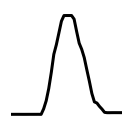

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203261945-1min.png
36 of 176 complete ........................



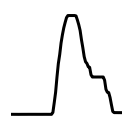

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203280646-1min.png
37 of 176 complete ........................



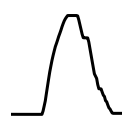

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203250606-1min.png
38 of 176 complete ........................



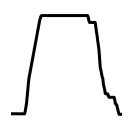

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203250829-1min.png
39 of 176 complete ........................



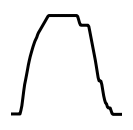

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203271254-1min.png
40 of 176 complete ........................



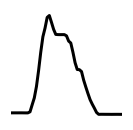

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203270425-1min.png
41 of 176 complete ........................



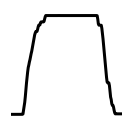

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203251356-1min.png
42 of 176 complete ........................



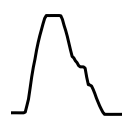

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203280437-1min.png
43 of 176 complete ........................



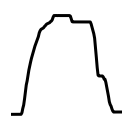

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203270937-1min.png
44 of 176 complete ........................



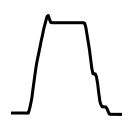

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203241900-1min.png
45 of 176 complete ........................



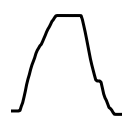

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203241032-1min.png
46 of 176 complete ........................



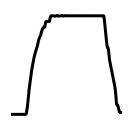

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203240652-1min.png
47 of 176 complete ........................



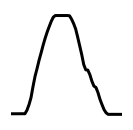

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203220533-1min.png
48 of 176 complete ........................



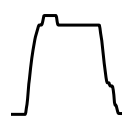

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203230830-1min.png
49 of 176 complete ........................



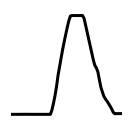

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203211750-1min.png
50 of 176 complete ........................



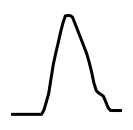

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203211449-1min.png
51 of 176 complete ........................



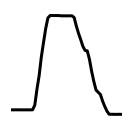

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203211556-1min.png
52 of 176 complete ........................



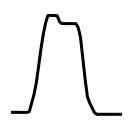

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203240431-1min.png
53 of 176 complete ........................



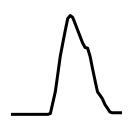

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203231950-1min.png
54 of 176 complete ........................



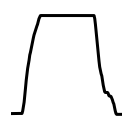

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203231301-1min.png
55 of 176 complete ........................



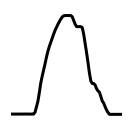

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203220753-1min.png
56 of 176 complete ........................



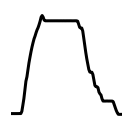

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203220943-1min.png
57 of 176 complete ........................



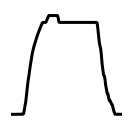

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203221312-1min.png
58 of 176 complete ........................



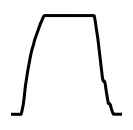

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203210420-1min.png
59 of 176 complete ........................



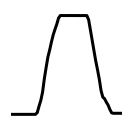

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203191524-1min.png
60 of 176 complete ........................



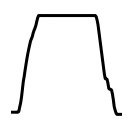

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203200526-1min.png
61 of 176 complete ........................



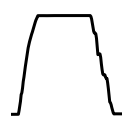

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203201004-1min.png
62 of 176 complete ........................



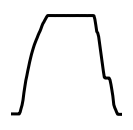

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203201713-1min.png
63 of 176 complete ........................



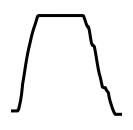

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203211026-1min.png
64 of 176 complete ........................



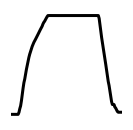

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203191944-1min.png
65 of 176 complete ........................



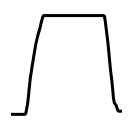

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203210750-1min.png
66 of 176 complete ........................



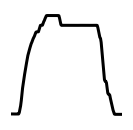

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203201331-1min.png
67 of 176 complete ........................



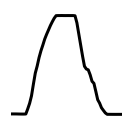

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203181716-1min.png
68 of 176 complete ........................



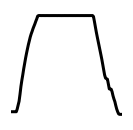

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203190532-1min.png
69 of 176 complete ........................



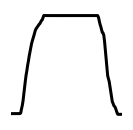

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203180926-1min.png
70 of 176 complete ........................



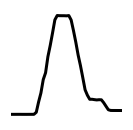

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203170757-1min.png
71 of 176 complete ........................



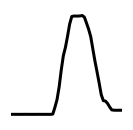

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203161413-1min.png
72 of 176 complete ........................



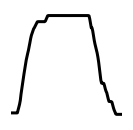

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203180624-1min.png
73 of 176 complete ........................



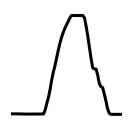

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203170603-1min.png
74 of 176 complete ........................



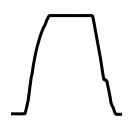

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203190920-1min.png
75 of 176 complete ........................



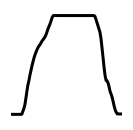

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203191152-1min.png
76 of 176 complete ........................



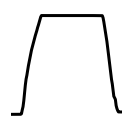

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203181943-1min.png
77 of 176 complete ........................



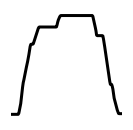

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203181220-1min.png
78 of 176 complete ........................



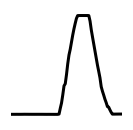

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203161750-1min.png
79 of 176 complete ........................



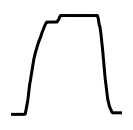

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203171833-1min.png
80 of 176 complete ........................



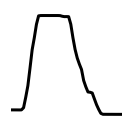

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203170926-1min.png
81 of 176 complete ........................



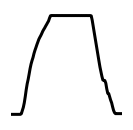

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203161151-1min.png
82 of 176 complete ........................



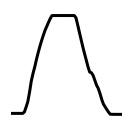

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203150516-1min.png
83 of 176 complete ........................



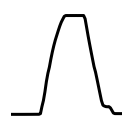

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203142127-1min.png
84 of 176 complete ........................



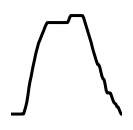

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203151546-1min.png
85 of 176 complete ........................



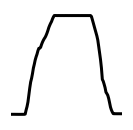

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203160634-1min.png
86 of 176 complete ........................



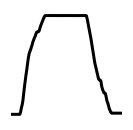

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203141820-1min.png
87 of 176 complete ........................



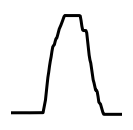

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203141535-1min.png
88 of 176 complete ........................



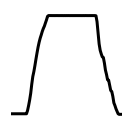

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203151024-1min.png
89 of 176 complete ........................



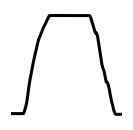

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203160929-1min.png
90 of 176 complete ........................



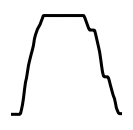

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203151241-1min.png
91 of 176 complete ........................



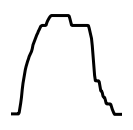

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203141154-1min.png
92 of 176 complete ........................



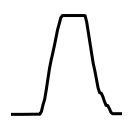

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203130915-1min.png
93 of 176 complete ........................



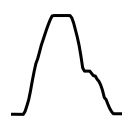

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203111320-1min.png
94 of 176 complete ........................



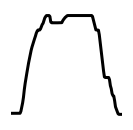

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203121205-1min.png
95 of 176 complete ........................



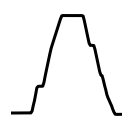

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203111540-1min.png
96 of 176 complete ........................



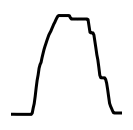

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203111808-1min.png
97 of 176 complete ........................



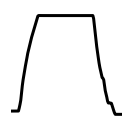

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203140535-1min.png
98 of 176 complete ........................



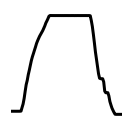

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203120545-1min.png
99 of 176 complete ........................



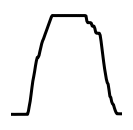

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203140913-1min.png
100 of 176 complete ........................



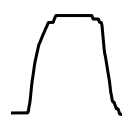

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203131217-1min.png
101 of 176 complete ........................



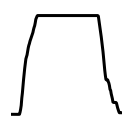

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203131528-1min.png
102 of 176 complete ........................



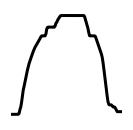

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203131950-1min.png
103 of 176 complete ........................



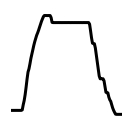

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203130545-1min.png
104 of 176 complete ........................



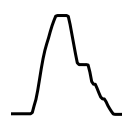

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203131045-1min.png
105 of 176 complete ........................



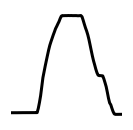

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204300750-1min.png
106 of 176 complete ........................



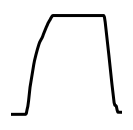

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205062047-1min.png
107 of 176 complete ........................



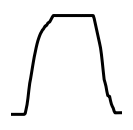

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204270903-1min.png
108 of 176 complete ........................



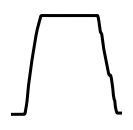

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204281108-1min.png
109 of 176 complete ........................



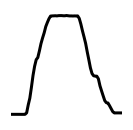

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204290826-1min.png
110 of 176 complete ........................



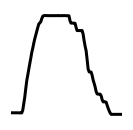

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205020509-1min.png
111 of 176 complete ........................



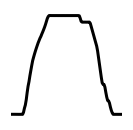

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205060625-1min.png
112 of 176 complete ........................



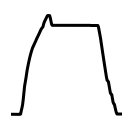

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205061208-1min.png
113 of 176 complete ........................



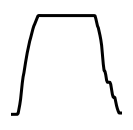

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205080927-1min.png
114 of 176 complete ........................



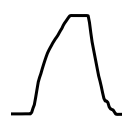

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204260813-1min.png
115 of 176 complete ........................



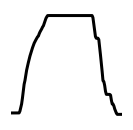

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204271155-1min.png
116 of 176 complete ........................



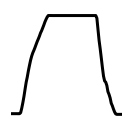

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204280516-1min.png
117 of 176 complete ........................



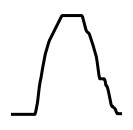

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204271543-1min.png
118 of 176 complete ........................



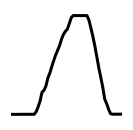

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205100604-1min.png
119 of 176 complete ........................



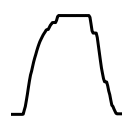

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205070908-1min.png
120 of 176 complete ........................



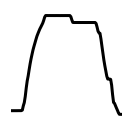

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205080526-1min.png
121 of 176 complete ........................



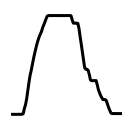

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204030448-1min.png
122 of 176 complete ........................



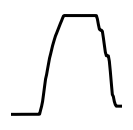

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205050832-1min.png
123 of 176 complete ........................



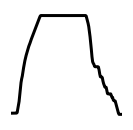

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204251748-1min.png
124 of 176 complete ........................



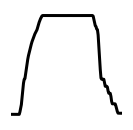

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204260433-1min.png
125 of 176 complete ........................



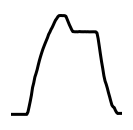

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204291645-1min.png
126 of 176 complete ........................



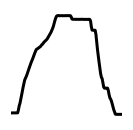

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205021635-1min.png
127 of 176 complete ........................



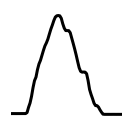

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205010855-1min.png
128 of 176 complete ........................



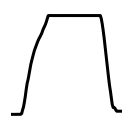

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205041959-1min.png
129 of 176 complete ........................



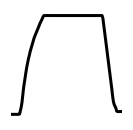

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205071957-1min.png
130 of 176 complete ........................



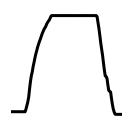

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204250732-1min.png
131 of 176 complete ........................



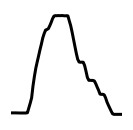

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204291434-1min.png
132 of 176 complete ........................



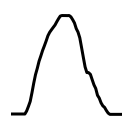

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205031503-1min.png
133 of 176 complete ........................



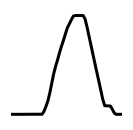

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204240828-1min.png
134 of 176 complete ........................



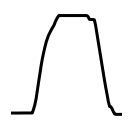

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203301816-1min.png
135 of 176 complete ........................



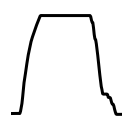

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203310729-1min.png
136 of 176 complete ........................



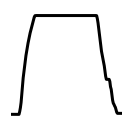

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203300432-1min.png
137 of 176 complete ........................



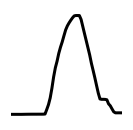

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203300818-1min.png
138 of 176 complete ........................



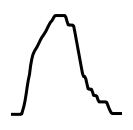

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204011007-1min.png
139 of 176 complete ........................



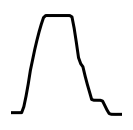

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203301031-1min.png
140 of 176 complete ........................



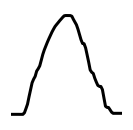

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203310506-1min.png
141 of 176 complete ........................



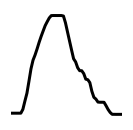

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204021029-1min.png
142 of 176 complete ........................



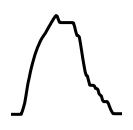

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204010459-1min.png
143 of 176 complete ........................



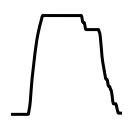

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204020433-1min.png
144 of 176 complete ........................



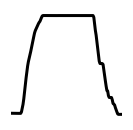

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204011718-1min.png
145 of 176 complete ........................



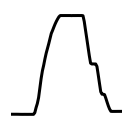

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204021241-1min.png
146 of 176 complete ........................



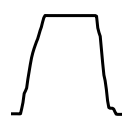

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204030647-1min.png
147 of 176 complete ........................



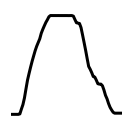

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204011509-1min.png
148 of 176 complete ........................



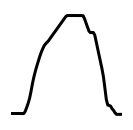

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204021819-1min.png
149 of 176 complete ........................



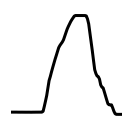

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204021439-1min.png
150 of 176 complete ........................



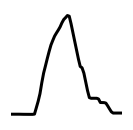

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204020813-1min.png
151 of 176 complete ........................



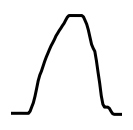

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204231253-1min.png
152 of 176 complete ........................



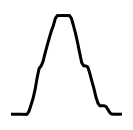

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204241039-1min.png
153 of 176 complete ........................



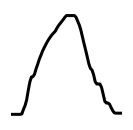

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204231441-1min.png
154 of 176 complete ........................



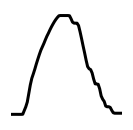

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204241446-1min.png
155 of 176 complete ........................



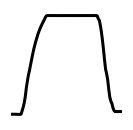

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204231658-1min.png
156 of 176 complete ........................



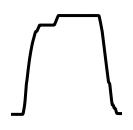

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200203311400-1min.png
157 of 176 complete ........................



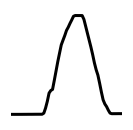

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205081531-1min.png
158 of 176 complete ........................



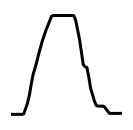

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205071523-1min.png
159 of 176 complete ........................



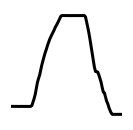

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205051058-1min.png
160 of 176 complete ........................



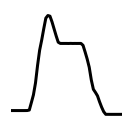

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205051522-1min.png
161 of 176 complete ........................



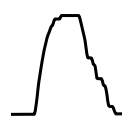

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205090547-1min.png
162 of 176 complete ........................



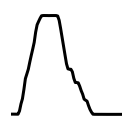

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205100802-1min.png
163 of 176 complete ........................



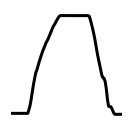

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205011119-1min.png
164 of 176 complete ........................



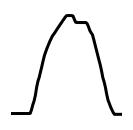

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205041346-1min.png
165 of 176 complete ........................



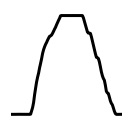

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205051730-1min.png
166 of 176 complete ........................



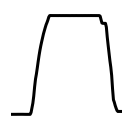

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204251153-1min.png
167 of 176 complete ........................



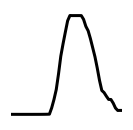

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205051401-1min.png
168 of 176 complete ........................



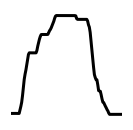

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205061756-1min.png
169 of 176 complete ........................



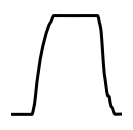

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204301736-1min.png
170 of 176 complete ........................



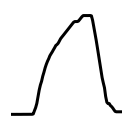

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204261800-1min.png
171 of 176 complete ........................



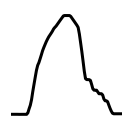

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204261004-1min.png
172 of 176 complete ........................



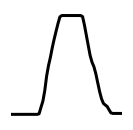

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204280753-1min.png
173 of 176 complete ........................



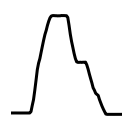

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200204291033-1min.png
174 of 176 complete ........................



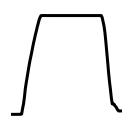

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205040744-1min.png
175 of 176 complete ........................



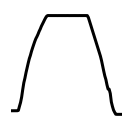

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/typ/687200205041036-1min.png
176 of 176 complete ........................



In [0]:
##allFiles = glob.glob(str(infpath/'png1'/'typ'/'*.png'))
allFiles = glob.glob(str(infpath/outpath/'typ'/'*.png'))
n = len(allFiles)
print(f'TOTAL FILES TO SHOW IN typ FOLDER: {n}\n')
for i,file_ in enumerate(allFiles):
    #if i==5: break
        
    display(Image(filename=file_))
    print(file_)
    
    print(f'{i+1} of {n} complete ........................\n')

TOTAL FILES TO SHOW IN non FOLDER: 32



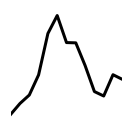

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200202150831-1min.png
1 of 32 complete ........................



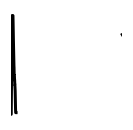

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200202161659-1min.png
2 of 32 complete ........................



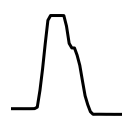

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200202140537-1min.png
3 of 32 complete ........................



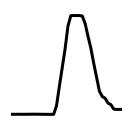

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200202131953-1min.png
4 of 32 complete ........................



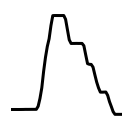

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200202121514-1min.png
5 of 32 complete ........................



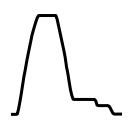

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200202131623-1min.png
6 of 32 complete ........................



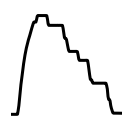

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200202120943-1min.png
7 of 32 complete ........................



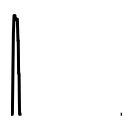

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200202111528-1min.png
8 of 32 complete ........................



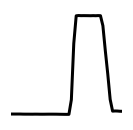

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200202101759-1min.png
9 of 32 complete ........................



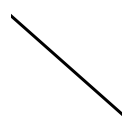

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203281149-1min.png
10 of 32 complete ........................



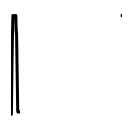

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203261651-1min.png
11 of 32 complete ........................



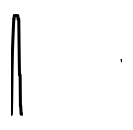

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203271534-1min.png
12 of 32 complete ........................



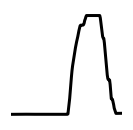

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203241237-1min.png
13 of 32 complete ........................



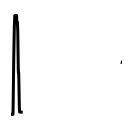

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203231654-1min.png
14 of 32 complete ........................



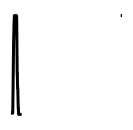

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203241624-1min.png
15 of 32 complete ........................



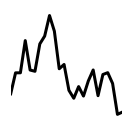

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203211357-1min.png
16 of 32 complete ........................



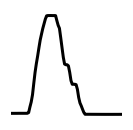

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203191702-1min.png
17 of 32 complete ........................



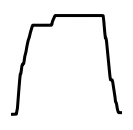

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203171447-1min.png
18 of 32 complete ........................



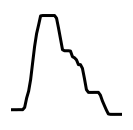

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203161527-1min.png
19 of 32 complete ........................



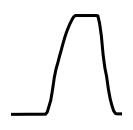

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203181554-1min.png
20 of 32 complete ........................



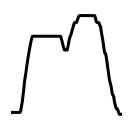

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203171133-1min.png
21 of 32 complete ........................



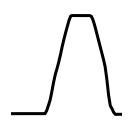

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200203111135-1min.png
22 of 32 complete ........................



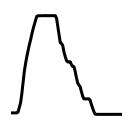

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200205021036-1min.png
23 of 32 complete ........................



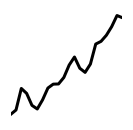

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200204030944-1min.png
24 of 32 complete ........................



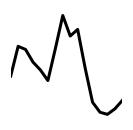

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200205041247-1min.png
25 of 32 complete ........................



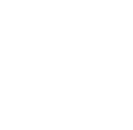

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200204230802-1min.png
26 of 32 complete ........................



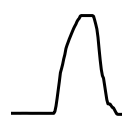

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200204011305-1min.png
27 of 32 complete ........................



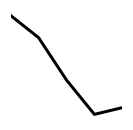

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200204021937-1min.png
28 of 32 complete ........................



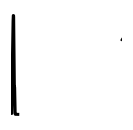

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200205071707-1min.png
29 of 32 complete ........................



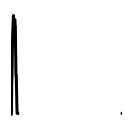

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200205041604-1min.png
30 of 32 complete ........................



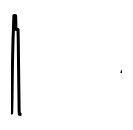

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200205031712-1min.png
31 of 32 complete ........................



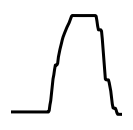

/content/gdrive/My Drive/dashlink/Tail_687_3/png4/non/687200204240520-1min.png
32 of 32 complete ........................



In [0]:
##allFiles = glob.glob(str(infpath/'png1'/'non'/'*.png'))
allFiles = glob.glob(str(infpath/outpath/'non'/'*.png'))
n = len(allFiles)
print(f'TOTAL FILES TO SHOW IN non FOLDER: {n}\n')
for i,file_ in enumerate(allFiles):
    #if i==5: break
        
    display(Image(filename=file_))
    print(file_)
    
    print(f'{i+1} of {n} complete ........................\n')

In [0]:
# manually evaluated test error (i.e. not validation)
# error rate = 9+0/111 = 0.081 = 8.1%